## Example 5.1: Blackjack 
Blackjack The object of the popular casino card game of blackjack is to
obtain cards the sum of whose numerical values is as great as possible without exceeding
21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider
the version in which each player competes independently against the dealer. The game
begins with two cards dealt to both dealer and player. One of the dealer’s cards is face
up and the other is face down. If the player has 21 immediately (an ace and a 10-card),
it is called a natural. He then wins unless the dealer also has a natural, in which case the
game is a draw. If the player does not have a natural, then he can request additional
cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust ). If he goes
bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks
according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and
hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win,
lose, or draw—is determined by whose final sum is closer to 21.

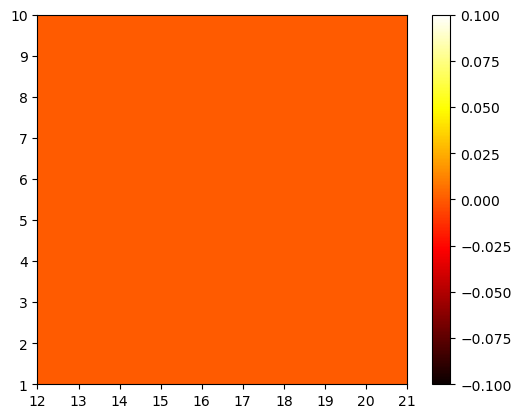

In [46]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

STATES = {(i, j, k) for i, j, k in product(range(1,11), range(12,22), range(2))}

ACTION = {'hit':1, 'stick':0}

def draw_a_card():
    card = np.random.randint(1, 14)
    if card > 10:
        return 10
    return card

def plot_values(values):
    vals = np.zeros((11,22,2))
    for i, j, k in product(range(1,11), range(12,22), range(2)):
        vals[i, j, k] = values[(i, j, k)]
    plt.imshow(vals.mean(axis=2), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.xlim(12, 21)
    plt.ylim(1, 10)
    plt.xticks(np.arange(12, 22, 1))
    plt.yticks(np.arange(1, 11, 1))
    plt.show()

values = {state: 0 for state in STATES}
plot_values(values)


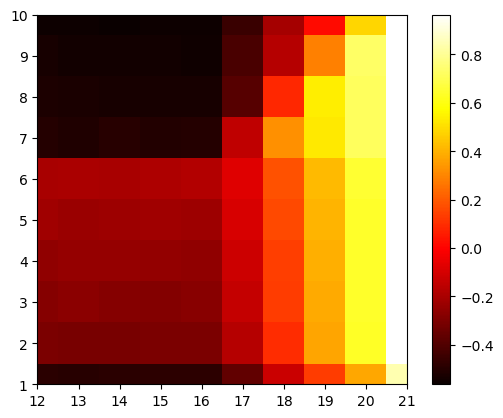

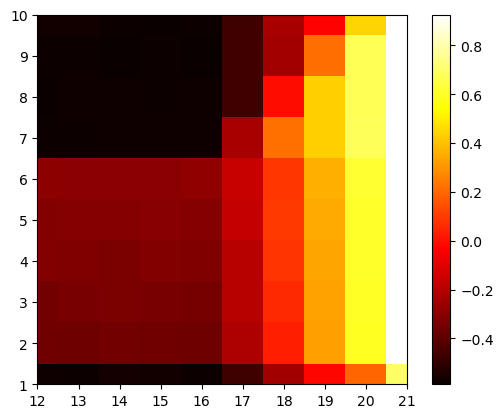

In [56]:
def expected_return(state):
    dealer_sum = state[0]
    my_sum = state[1]

    if my_sum > 21:
        return -1
    
    if_dealer_has_ace = state[2]
    if my_sum == 21:
        new_card = draw_a_card()
        dealer_sum += new_card
        if dealer_sum <=11 and if_dealer_has_ace:
            dealer_sum += 10
        if dealer_sum == 21:
            return 0
        return 1

    while dealer_sum < 17:
        new_card = draw_a_card()
        dealer_sum += new_card
        if dealer_sum <=11 and if_dealer_has_ace:
            dealer_sum += 10
    
    if dealer_sum > 21:
        return 1
    
    if my_sum > dealer_sum:
        return 1
    
    if my_sum == dealer_sum:
        return 0
    
    return -1
    

def iterate_values(n=10000, useable_ace=False):
    values = {state: 0 for state in STATES}
    for _ in range(n):
        for state in STATES:
            if useable_ace:
                state = (state[0], state[1], 1)
            values[state] += expected_return(state)
            
    for state in STATES:
        values[state] /= n
    
    return values

values = iterate_values()
plot_values(values)

values = iterate_values(useable_ace=True)
plot_values(values)

In [49]:
for state in STATES:
    print(state, expected_return(state))

(8, 17, 0) 0
(9, 12, 1) None
(9, 15, 0) None
(1, 14, 1) None
(5, 18, 1) None
(3, 15, 1) None
(3, 16, 0) 1
(4, 13, 1) 1
(8, 14, 1) None
(7, 13, 0) None
(8, 19, 0) 1
(9, 14, 1) None
(2, 12, 0) None
(6, 12, 1) 1
(3, 17, 1) 1
(6, 13, 0) None
(3, 18, 0) None
(8, 16, 1) None
(9, 18, 1) None
(6, 17, 0) 1
(7, 12, 1) None
(4, 17, 1) 1
(10, 21, 0) 1
(8, 20, 1) 1
(1, 15, 1) None
(1, 16, 0) None
(3, 19, 1) 0
(2, 15, 1) None
(6, 19, 0) 1
(7, 14, 1) None
(1, 17, 1) 1
(9, 16, 0) None
(1, 18, 0) None
(4, 14, 1) None
(7, 18, 1) None
(9, 20, 0) 1
(5, 12, 1) None
(2, 17, 1) 1
(5, 13, 0) None
(4, 18, 1) None
(6, 18, 1) None
(4, 19, 0) 1
(10, 15, 1) None
(8, 13, 0) None
(5, 14, 1) None
(3, 12, 0) 1
(4, 20, 1) None
(4, 21, 0) 1
(7, 16, 0) None
(8, 21, 1) 1
(7, 20, 0) 1
(8, 15, 0) None
(9, 21, 1) 1
(2, 19, 0) 1
(3, 13, 1) None
(6, 20, 0) 0
(3, 14, 0) 1
(7, 19, 1) 1
(10, 17, 0) None
(1, 12, 0) 1
(2, 18, 1) 1
(2, 21, 0) 1
(5, 16, 0) 1
(6, 21, 1) 1
(1, 20, 1) None
(5, 20, 0) 0
(6, 15, 0) None
(7, 21, 1) 1
(10, 